<a href="https://colab.research.google.com/github/jsmazorra/DS-Unit-2-Kaggle-Challenge/blob/master/module1-decision-trees/Johan_Mazorra_LS_DS13_221_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

     |████████████████████████████████| 102kB 2.3MB/s 
     |████████████████████████████████| 194kB 2.8MB/s 
     |████████████████████████████████| 614kB 53.4MB/s 
     |████████████████████████████████| 1.5MB 45.6MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 256kB 48.8MB/s 
     |████████████████████████████████| 307kB 50.5MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 215kB 43.2MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 747kB 47.8MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none-any.whl size=241329 sha256=71b00c14b727045744330af7ec32027b8ffbce4aea2c409ebaa59ad55d14bd9a
  Stored in directory: /root/.cache/pip/wheels/9b/c9/f1/4a2f30c760e017f3e2f46be999c4597a93d126ef5ea38e276f
  Created wheel for confuse: filename=confuse-1.0.0-cp36

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [3]:
# Check Pandas Profiling version
import pandas_profiling
pandas_profiling.__version__

'2.5.0'

In [4]:
# Old code for Pandas Profiling version 2.3
# It can be very slow with medium & large datasets.
# These parameters will make it faster.

# profile = train.profile_report(
#     check_correlation_pearson=False,
#     correlations={
#         'pearson': False,
#         'spearman': False,
#         'kendall': False,
#         'phi_k': False,
#         'cramers': False,
#         'recoded': False,
#     },
#     plot={'histogram': {'bayesian_blocks_bins': False}},
# )
#

# New code for Pandas Profiling version 2.4
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

In [5]:
# Let's start by getting a validating portion of my training data.
train, val = train_test_split(train, train_size=.8, test_size=.2, stratify=train['status_group'], random_state=42)

print(train.shape, val.shape, test.shape)

(47520, 41) (11880, 41) (14358, 40)


In [32]:
# Let me check both the numerical and categorical stats of the training and testing data.
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,47520.000000,47520.000000,47520.000000,46078.000000,46078.000000,47520.000000,47520.000000,47520.000000,47520.000000,47520.000000
mean,37037.915699,321.925261,669.567656,35.149033,-5.884512,0.477736,15.258291,5.616751,179.805513,1302.768939
std,21412.099719,3197.240487,693.005745,2.604241,2.805599,13.312977,17.530228,9.621230,463.081564,950.955437
min,0.000000,0.000000,-63.000000,29.607122,-11.649440,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18482.750000,0.000000,0.000000,33.284679,-8.633876,0.000000,5.000000,2.000000,0.000000,0.000000
50%,36986.500000,0.000000,372.500000,35.008578,-5.170151,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55450.250000,25.000000,1320.000000,37.223501,-3.375068,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.344301,-0.998464,1776.000000,99.000000,80.000000,15300.000000,2013.000000


In [34]:
train.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,47520,44616,44603,47520,47520,47234,47520,47520,47520,44876,47520,44392,24988,45077,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520
unique,349,1716,1929,30661,9,17231,21,124,2082,2,1,12,2563,2,18,13,7,12,5,7,7,8,6,5,10,7,3,7,6,3
top,2011-03-17,Government Of Tanzania,DWE,none,Lake Victoria,Shuleni,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,474,7321,13978,2879,8137,420,4250,2003,257,40838,47520,29470,548,31071,21448,21448,21448,32449,42027,20287,20287,40598,40598,26567,13620,13620,36638,22778,27642,25807


In [33]:
test.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14358.000000,14358.000000,14358.0000,13922.000000,13922.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000
mean,37232.859799,324.219996,653.6363,35.149785,-5.876017,0.408971,15.156359,5.713052,187.055439,1298.251985
std,21382.890432,2533.367778,688.2721,2.630794,2.812643,8.231859,17.387588,9.794304,476.065978,952.551852
min,10.000000,0.000000,-57.0000,29.612776,-11.564592,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18765.500000,0.000000,0.0000,33.229459,-8.573902,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37442.000000,0.000000,346.0000,35.005867,-5.239595,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55909.250000,25.000000,1306.0000,37.287413,-3.359454,0.000000,17.000000,5.000000,230.000000,2004.000000
max,74249.000000,200000.000000,2777.0000,40.325016,-0.998752,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [35]:
test.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,14358,13575,13570,14358,14358,14264,14358,14358,14358,13573,14358,13419,7519,13695,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358
unique,331,960,1075,10615,9,8253,21,124,1934,2,1,11,1772,2,17,13,7,12,5,7,7,8,6,5,10,7,3,7,6
top,2011-03-16,Government Of Tanzania,DWE,none,Lake Victoria,Shuleni,Shinyanga,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,Borehole,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,shallow well,shallow well,groundwater,communal standpipe,communal standpipe
freq,137,2117,4162,822,2535,136,1258,611,79,12308,14358,8807,158,9442,6168,6168,6168,9780,12639,6098,6098,12237,12237,7997,4211,4211,11127,6790,8260


In [0]:
import numpy as np

def clean_dfs(X_to_clean):
  X_to_clean = X_to_clean.copy()

  # Replace the zeros with NaNs.
  X_to_clean['latitude'] = X_to_clean['latitude'].replace(-2e-08,0)
  for col in ['longitude','latitude']:
    X_to_clean[col] = X_to_clean[col].replace(0, np.NaN)

# Let's duplicate the dataframe.
  X_to_clean = X_to_clean.drop(['quantity_group'], axis=1)

  return X_to_clean

train = clean_dfs(train)
val = clean_dfs(val)
test = clean_dfs(test)

In [20]:
train['status_group'].value_counts(normalize=True)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

In [21]:
# The target is going to be the status of the pump.
target = 'status_group'

# Now let's pick the features.
features = train.drop([target, 'id'], axis=1)

num_features = features.select_dtypes(include='number').columns.tolist()

cat_features = features.select_dtypes(exclude='number').nunique()
cat_features = cat_features[cat_features <= 50].index.tolist()

features = num_features + cat_features
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'basin', 'region', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [0]:
# Next, let's create the matrices.
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [10]:
# We're going to set up a decision tree classifier without any hyperparameters.
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42)
)

pipeline.fit(X_train, y_train)

# Let's check the accuracy scores.
print(f'Train Accuracy: {pipeline.score(X_train, y_train)}')
print(f'Validation Accuracy: {pipeline.score(X_val, y_val)}')

Train Accuracy: 0.9954755892255892
Validation Accuracy: 0.7585858585858586


In [29]:
# Let's see what results we will get with a logistic regression.
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter('ignore')

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression(multi_class='auto',solver='lbfgs',n_jobs=1)
)

pipeline.fit(X_train, y_train)

# Check the scores.
print(f'Logistic Regression:')
print(f'\tTrain Accuracy: {pipeline.score(X_train, y_train)}')
print(f'\tValidation Accuracy: {pipeline.score(X_val, y_val)}')

Logistic Regression:
	Train Accuracy: 0.7335227272727273
	Validation Accuracy: 0.7308080808080808


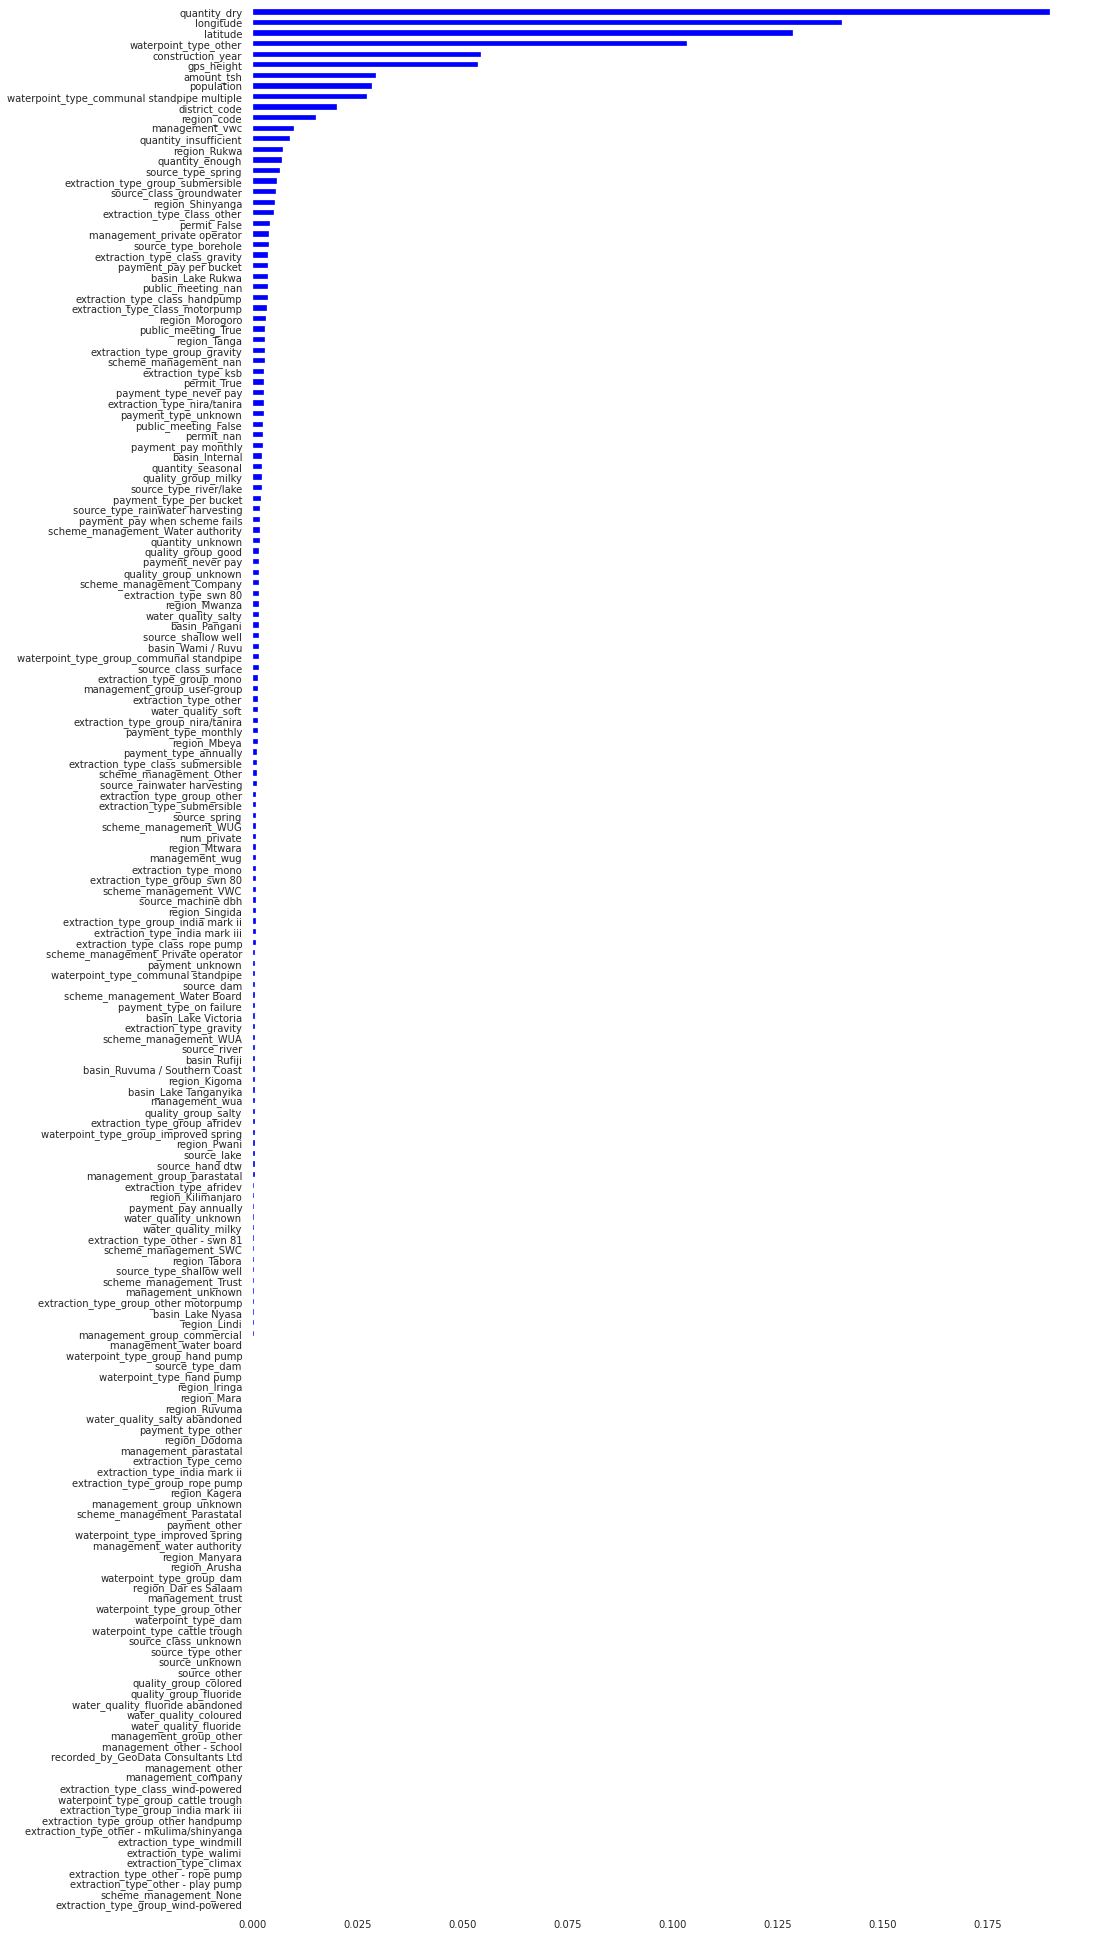

In [31]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42, min_samples_leaf=6)
)

pipeline.fit(X_train, y_train)

# Now let's plot the coefficents for the graph.
import matplotlib.pyplot as plt
model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)

plt.figure(figsize=(15,35))
importances.sort_values().plot.barh(color='blue')
plt.show()

In [14]:
# Let's do the Kaggle submission.
sample_submission.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,functional
4,49871,functional


In [15]:
# Let's get a prediction of the model.
y_pred = pipeline.predict(X_test)
y_pred

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [16]:
kaggle_sub = pd.DataFrame(data=y_pred,index=test['id'],columns=['status_group']).reset_index()

kaggle_sub.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
